In [1]:
import numpy as np
import scipy

print("NumPy version:", np.__version__)
print("SciPy version:", scipy.__version__)


NumPy version: 2.3.4
SciPy version: 1.16.3


In [2]:
####################################################
################ Numpy Library  ################ 
####################################################

In [3]:
import pandas as pd
df = pd.read_csv("../data/insurance_business_data.csv")
df.head()

,Date,Region,Channel,PoliciesSold,TotalPremium,TotalClaims,CustomerSatisfaction,CommissionRate,PolicyDurationMonths,AvgCustomerAge,ClaimFrequency,ClaimSeverity,RenewalRate,OperatingCost,Profit,LossRatio,ClaimsPerPolicy
0,01/07/2024,South,Branch,263,179070,119404,9.14,6.68,6,61,0.159,798.55,0.57,6781,52885,0.667,41.82
1,01/04/2024,East,Online,475,135990,61632,7.36,4.13,6,25,0.318,681.67,0.57,17026,57332,0.453,151.05
2,01/11/2024,North,Online,752,171670,61476,8.51,6.34,12,40,0.407,652.02,0.71,16323,93871,0.358,306.06
3,01/08/2024,North,Branch,367,156917,137220,6.86,6.22,6,54,0.065,319.44,0.77,17962,1735,0.874,23.86
4,01/05/2024,North,Partner,648,284975,50285,8.39,5.39,12,33,0.373,340.77,0.53,11857,222833,0.176,241.70


In [4]:
################ Check the dataset  ################ 

In [5]:
############################# Use Panda only for a small checking in data #############################
# Check for missing values
print("Missing values per column:")
print(df.isna().sum())

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

Missing values per column:
Date                    0
Region                  0
Channel                 0
PoliciesSold            0
TotalPremium            0
TotalClaims             0
CustomerSatisfaction    0
CommissionRate          0
PolicyDurationMonths    0
AvgCustomerAge          0
ClaimFrequency          0
ClaimSeverity           0
RenewalRate             0
OperatingCost           0
Profit                  0
LossRatio               0
ClaimsPerPolicy         0
dtype: int64

Duplicate rows: 0


In [6]:
################ Arrays & Basics  ################ 

In [7]:
import numpy as np

In [8]:
# Convert Pandas column to NumPy array
premium_array = df["TotalPremium"].to_numpy()

In [9]:
# Preview first 10 values
premium_array[:10]

array([179070, 135990, 171670, 156917, 284975,  53650,  95117, 141244,
       289270, 233844])

In [10]:
# Inspect array properties
print("Shape:", premium_array.shape)
print("Data type:", premium_array.dtype)
print("Dimensions:", premium_array.ndim)


Shape: (2500,)
Data type: int64
Dimensions: 1


In [11]:
# Reshape to represent 12 months × 4 regions (48 values)
reshaped = premium_array[:48].reshape(12, 4)
reshaped

array([[179070, 135990, 171670, 156917],
       [284975,  53650,  95117, 141244],
       [289270, 233844,  53190,  98113],
       [189861,  82125, 279767, 180000],
       [198531, 216490, 161904, 228157],
       [ 68768, 231033, 131099, 208957],
       [137421, 242154,  56895, 231383],
       [270566, 248139, 121017,  73932],
       [ 71360, 104847, 290250, 140365],
       [135468,  88931, 105823,  88032],
       [296991, 262498,  68807, 192839],
       [189143, 103413, 207221,  65540]])

In [12]:
# Region labels for clarity
regions = np.array(["North", "South", "East", "West"])
regions

array(['North', 'South', 'East', 'West'], dtype='<U5')

In [13]:
################ Vectorized Math & Broadcasting  ################ 

In [14]:
import numpy as np
# Convert relevant columns to NumPy arrays
premium_array = df["TotalPremium"].to_numpy()
claims_array = df["TotalClaims"].to_numpy()

In [15]:
# Forecast: 5% growth in premiums
forecast_premiums = premium_array * 1.05

In [16]:
# Claim ratio (claims / premiums)
claim_ratio = np.divide(
    claims_array,
    premium_array,
    out=np.zeros_like(claims_array, dtype=float),
    where=premium_array != 0
)

In [17]:
# Preview results
print("Forecast premiums (first 5):", forecast_premiums[:5])
print("Claim ratio (first 5):", claim_ratio[:5])

Forecast premiums (first 5): [188023.5  142789.5  180253.5  164762.85 299223.75]
Claim ratio (first 5): [0.66680069 0.45320979 0.35810567 0.87447504 0.17645407]


In [18]:
################ Statistics & Aggregations  ################ 

In [19]:
# ---- Using reshaped data from previous steps ----
# Each row = month, each column = region
claims_matrix  = claims_array[:48].reshape(12, 4)
premium_matrix = premium_array[:48].reshape(12, 4)

In [20]:
# ---- Basic statistics per region ----
# Mean, Standard Deviation, 90th Percentile
mean_claims   = np.mean(claims_matrix, axis=0)
std_claims    = np.std(claims_matrix, axis=0)
percentile_90 = np.percentile(claims_matrix, 90, axis=0)

In [21]:
# ---- Correlation between average claims and premiums ----
correlation = np.corrcoef(mean_claims, np.mean(premium_matrix, axis=0))[0, 1]

In [22]:
# ---- Display results ----
print("Average claims per region:", mean_claims)
print("Claim volatility (std):", std_claims)
print("90th percentile claims:", percentile_90)
print("Claims–Premiums correlation:", correlation)

Average claims per region: [81973.25       84340.75       79749.75       90404.58333333]
Claim volatility (std): [36473.0384191  29486.69479366 35526.63760271 37775.48852863]
90th percentile claims: [134510.5 128001.4 126476.3 136579.4]
Claims–Premiums correlation: -0.21754058653285066


In [23]:
################ Boolean Logic & Indexing  ################ 

In [24]:
# Boolean mask: flag risky months (claim ratio > 0.6)
risky_mask = claim_ratio > 0.6

In [25]:
# Apply conditional labeling
risky_labels = np.where(risky_mask, "High Risk", "Normal")

In [26]:
# Display first results
print("Claim ratios (first 10):", claim_ratio[:10])
print("Risk categories (first 10):", risky_labels[:10])

Claim ratios (first 10): [0.66680069 0.45320979 0.35810567 0.87447504 0.17645407 0.82300093
 0.42110243 0.26312622 0.11905486 0.59103933]
Risk categories (first 10): ['High Risk' 'Normal' 'Normal' 'High Risk' 'Normal' 'High Risk' 'Normal'
 'Normal' 'Normal' 'Normal']


In [27]:
# Optional: count high-risk months
high_risk_count = np.sum(risky_mask)
print("Total high-risk months:", high_risk_count)

Total high-risk months: 942


In [28]:
################ Linear Algebra & Random Sampling  ################ 

In [29]:
# --- 1) Weighted KPI with np.dot ------- 
# Region-average premium from the first 12×4 (months×regions)
prem_array = df["TotalPremium"].to_numpy()
prem_matrix = prem_array[:48].reshape(12, 4)       # 12 months × 4 regions
region_avg_prem = prem_matrix.mean(axis=0)         # length-4 vector

# Choose business weights (must sum to 1.0)
weights = np.array([0.35, 0.25, 0.20, 0.20])       # North, South, East, West
weighted_kpi = np.dot(region_avg_prem, weights)

print("Region avg premiums:", np.round(region_avg_prem, 2))
print("Weights:", weights, " (sum=", weights.sum(), ")")
print("Weighted KPI (premium index):", round(float(weighted_kpi), 2))

Region avg premiums: [192618.67 166926.17 145230.   150456.58]
Weights: [0.35 0.25 0.2  0.2 ]  (sum= 1.0 )
Weighted KPI (premium index): 168285.39


In [30]:
# --- 2) Allocation with np.linalg.solve ----------- 
# Example business rule: Allocate 60% of total budget between North & South
#   Constraints: North + South = 0.60 (60% του συνολικού)
#                 North = 1.5 × South  (λόγω υψηλότερου ρίσκου/στόχου)
A = np.array([[1.0, 1.0],
              [1.0, -1.5]])
b = np.array([0.60, 0.0])

north_share, south_share = np.linalg.solve(A, b)
print("North share:", round(float(north_share), 4),
      " | South share:", round(float(south_share), 4),
      " | Check sum:", round(float(north_share + south_share), 4))

North share: 0.36  | South share: 0.24  | Check sum: 0.6


In [31]:
# --- 3) Random audit sample with np.random.choice ------- 
np.random.seed(42)
audit_idx = np.random.choice(df.index, size=5, replace=False)
audit_view = df.loc[audit_idx, ["TotalPremium", "TotalClaims"]]
audit_view


,TotalPremium,TotalClaims
1447,264178,91887
1114,137310,51357
1064,171939,97108
2287,173911,103721
1537,221153,60639


In [32]:
################ Quick Mini Task  ################ 

In [33]:
# Convert columns to NumPy arrays
premiums = df["TotalPremium"].to_numpy()
claims = df["TotalClaims"].to_numpy()

# Compute claim ratio
claim_ratio = np.divide(claims, premiums, out=np.zeros_like(claims, dtype=float), where=premiums != 0)

# Summaries
print("Average Premium:", np.round(np.mean(premiums), 2))
print("Average Claims:", np.round(np.mean(claims), 2))
print("Average Claim Ratio:", np.round(np.mean(claim_ratio), 3))
print("Highest Claim Ratio:", np.round(np.max(claim_ratio), 3))
print("Month Index with Highest Ratio:", np.argmax(claim_ratio))



Average Premium: 175324.44
Average Claims: 85540.71
Average Claim Ratio: 0.615
Highest Claim Ratio: 2.939
Month Index with Highest Ratio: 2450


In [34]:
# Convert to NumPy array
claims = df["TotalClaims"].to_numpy().astype(float)

# Simulate a few missing values (for demo only)
claims[3] = np.nan
claims[10] = np.nan

print("Raw claims sample:", claims[:12])
print("Mean ignoring NaN:", np.nanmean(claims))

Raw claims sample: [119404.  61632.  61476.     nan  50285.  44154.  40054.  37165.  34439.
 138211.     nan 108051.]
Mean ignoring NaN: 85528.43314651721


In [35]:
#################################################
################ Scipy Library  ################ 
####################################################

In [36]:
import pandas as pd
df = pd.read_csv("../data/business_sales_trends.csv")
df.head()

,Year,Month,Region,Channel,NewSales,AvgSaleValue,MarketingCost,OperationalCost,CustomerSatisfaction,TotalRevenue,Profit,ROI,CostPerSale
0,2020,1,East,Retail,848,239.27,97306.70,32132.62,6.18,202900.96,73461.64,75.49,37.89
1,2020,1,East,Online,413,600.21,93217.76,43213.17,7.53,247886.73,111455.80,119.56,104.63
2,2020,1,East,Online,453,879.70,88258.03,43406.64,8.32,398504.10,266839.43,302.34,95.82
3,2020,1,South,Partner,532,1095.69,76813.29,73656.22,9.03,582907.08,432437.57,562.97,138.45
4,2020,1,South,Partner,416,611.30,36993.65,79127.79,8.88,254300.80,138179.36,373.52,190.21


In [37]:
################ Statistical Description  ################ 

In [38]:
from scipy import stats

# ---- Statistical summary for Profit ----
desc = stats.describe(df["Profit"])

print("Number of observations:", desc.nobs)
print("Min and Max:", desc.minmax)
print("Mean:", desc.mean)
print("Variance:", desc.variance)
print("Skewness:", desc.skewness)
print("Kurtosis:", desc.kurtosis)


Number of observations: 1200
Min and Max: (np.float64(-114411.05), np.float64(1121327.5))
Mean: 288254.1004666667
Variance: 64258486162.554756
Skewness: 0.8363438485894442
Kurtosis: 0.07049824223974133


In [39]:
################ Correlation Analysis  ################ 

In [40]:
# ---- Correlation between TotalRevenue and Profit ----
corr_coef, p_value = stats.pearsonr(df["MarketingCost"], df["TotalRevenue"])
print("Correlation:", corr_coef)
print("P-value:", p_value)

Correlation: 0.03450089870544424
P-value: 0.23237777274248048


In [41]:
################ Hypothesis Testing  ################ 

In [42]:
from scipy import stats

# ---- Split data into two groups ----
online_profit = df[df["Channel"] == "Online"]["Profit"]
retail_profit = df[df["Channel"] == "Retail"]["Profit"]

# ---- Perform independent t-test ----
t_stat, p_value = stats.ttest_ind(online_profit, retail_profit, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 1.811724119219792
P-value: 0.07040605487861044


In [43]:
################ Outlier Detection  ################ 

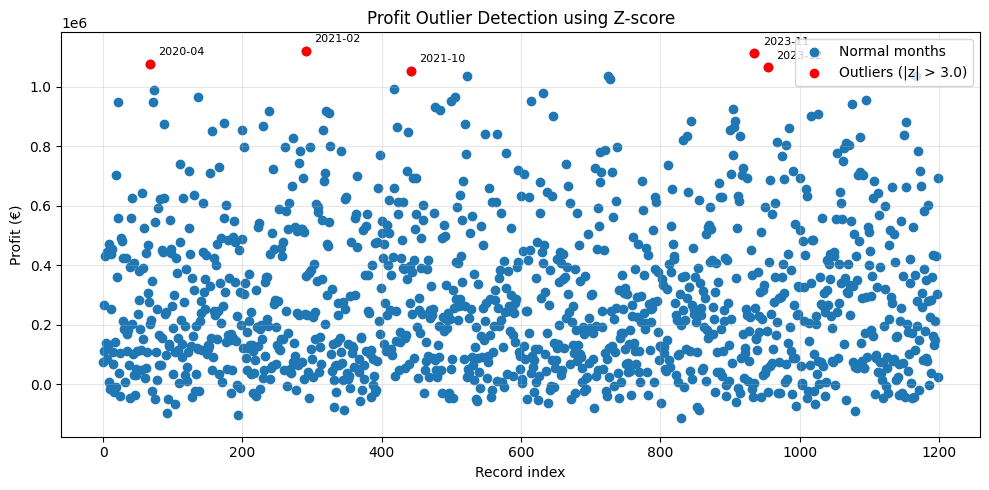

,Year,Month,Profit,zscore_profit
291,2021,2,1121327.50,3.287752
935,2023,11,1113658.77,3.257487
67,2020,4,1077475.71,3.114689
954,2023,12,1066937.03,3.073098
442,2021,10,1053707.29,3.020887


In [44]:
import matplotlib.pyplot as plt

profit = df["Profit"].astype(float).to_numpy()

# Calculate the z-score for each record (standardized distance from the mean)
z = stats.zscore(profit, nan_policy="omit")
df["zscore_profit"] = z

# Define the threshold for detecting outliers
threshold = 3.0

# Create a mask for points whose absolute z-score exceeds the threshold
outlier_mask = np.abs(df["zscore_profit"]) > threshold

# Extract outlier rows (keep year and month for labeling)
outliers = df.loc[outlier_mask, ["Year", "Month", "Profit", "zscore_profit"]]

# Create a scatter plot with normal points and outliers highlighted
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df["Profit"], label="Normal months")
plt.scatter(outliers.index, outliers["Profit"], label="Outliers (|z| > {:.1f})".format(threshold), color="red")

# Label outlier points with year-month
for idx, row in outliers.iterrows():
    label = f'{int(row["Year"])}-{int(row["Month"]):02d}'
    plt.annotate(label, (idx, row["Profit"]),
                 xytext=(6, 6), textcoords="offset points", fontsize=8)

# Add title, axes, and legend
plt.title("Profit Outlier Detection using Z-score")
plt.xlabel("Record index")
plt.ylabel("Profit (€)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display the outlier table (optional)
display(outliers.sort_values("zscore_profit", key=np.abs, ascending=False).head(10))


In [45]:
################ Signal Processing / Smoothing  ################ 

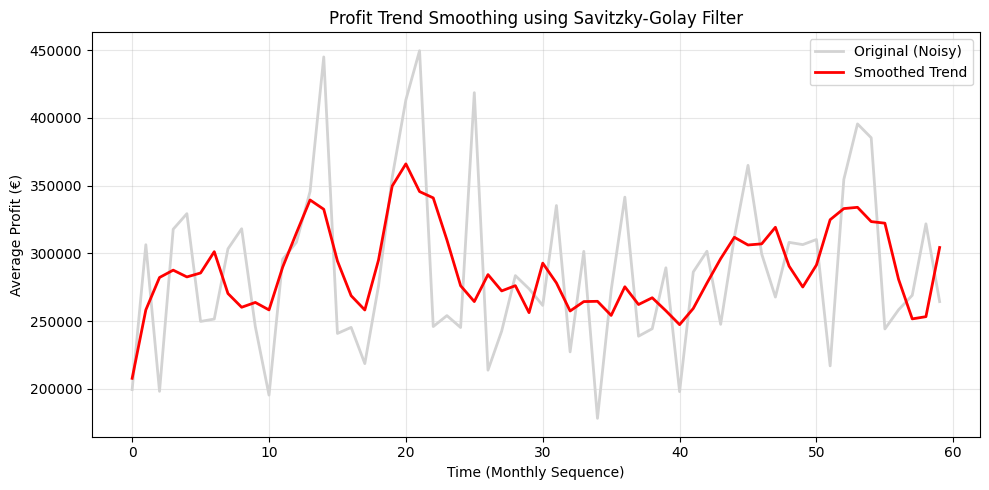

In [46]:
from scipy.signal import savgol_filter

# 1) Extract monthly claim or profit trend
monthly_profit = df.groupby(["Year", "Month"])["Profit"].mean().reset_index()

# 2) Convert month/year to time index
monthly_profit["TimeIndex"] = np.arange(len(monthly_profit))

# 3) Apply Savitzky-Golay filter for smoothing
window_size = 9   # must be odd number
poly_order = 3    # polynomial degree for local fitting
monthly_profit["SmoothedProfit"] = savgol_filter(monthly_profit["Profit"], window_size, poly_order)

# 4) Plot noisy (raw) vs smoothed signal
plt.figure(figsize=(10, 5))
plt.plot(monthly_profit["TimeIndex"], monthly_profit["Profit"], label="Original (Noisy)", color="lightgray", linewidth=2)
plt.plot(monthly_profit["TimeIndex"], monthly_profit["SmoothedProfit"], label="Smoothed Trend", color="red", linewidth=2)
plt.title("Profit Trend Smoothing using Savitzky-Golay Filter")
plt.xlabel("Time (Monthly Sequence)")
plt.ylabel("Average Profit (€)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [47]:
################ Optimization & Interpolation   ################ 

In [48]:
# === Part A: Optimization of Commission Rate ===
import numpy as np
from scipy.optimize import minimize

# Prepare input arrays
rev = df["TotalRevenue"].astype(float).to_numpy()
mkt = df["MarketingCost"].astype(float).to_numpy()
ops = df["OperationalCost"].astype(float).to_numpy()
obs = df["Profit"].astype(float).to_numpy()

# Define the objective function (mean squared error)
def sse(params):
    c = params[0]  # commission rate
    pred = rev * (1.0 - c) - (mkt + ops)
    return np.mean((pred - obs) ** 2)  # mean squared error

# Run the optimization to find best-fit commission rate
res = minimize(sse, x0=[0.05], bounds=[(0.0, 0.30)])  # 0%–30% range
opt_commission = res.x[0]

print("Optimal commission (best fit):", round(opt_commission * 100, 2), "%")
print("Objective (MSE):", res.fun)

Optimal commission (best fit): 0.0 %
Objective (MSE): 1.0865631268994898e-21


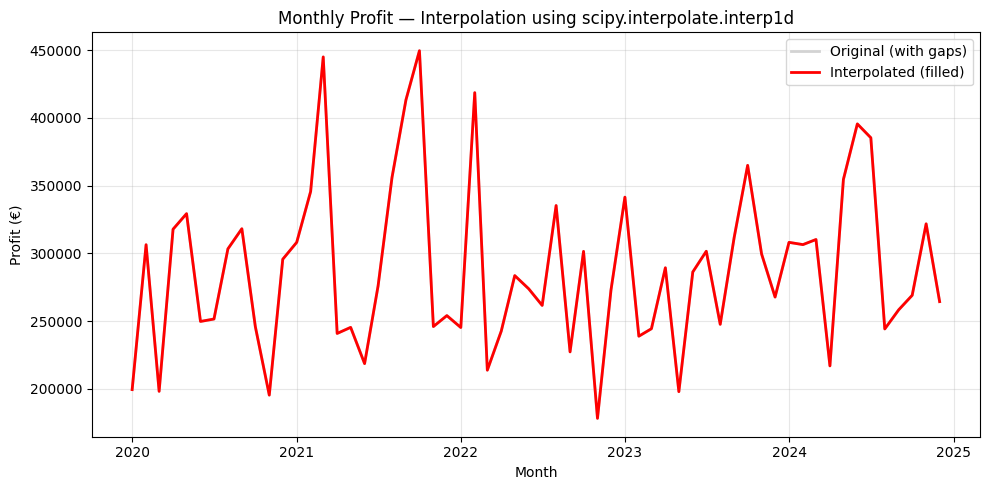

In [49]:
# === Part B: Interpolation to Fill Missing Months ===
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Build a monthly profit time series
date = pd.to_datetime(
    df["Year"].astype(int).astype(str) + "-" + df["Month"].astype(int).astype(str) + "-01"
)
monthly = (
    pd.DataFrame({"Date": date, "Profit": df["Profit"].astype(float)})
    .groupby("Date", as_index=False)
    .mean()
    .set_index("Date")
    .sort_index()
)

# Reindex to a full monthly range (fill gaps with NaN)
full_idx = pd.date_range(monthly.index.min(), monthly.index.max(), freq="MS")
full = monthly.reindex(full_idx)

# Apply linear interpolation using interp1d
x_known = full.dropna().index.map(pd.Timestamp.toordinal).to_numpy()
y_known = full.dropna()["Profit"].to_numpy()
f = interp1d(x_known, y_known, kind="linear", fill_value="extrapolate")

x_all = full.index.map(pd.Timestamp.toordinal).to_numpy()
full["Profit_filled"] = f(x_all)

# Plot the original (with gaps) vs interpolated
plt.figure(figsize=(10,5))
plt.plot(full.index, full["Profit"], label="Original (with gaps)", color="lightgray", linewidth=2)
plt.plot(full.index, full["Profit_filled"], label="Interpolated (filled)", color="red", linewidth=2)
plt.title("Monthly Profit — Interpolation using scipy.interpolate.interp1d")
plt.xlabel("Month")
plt.ylabel("Profit (€)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [50]:
####################################################
################ DEMO: Numpy & Scipy Libraries ################ 
####################################################

In [51]:
import pandas as pd

df = pd.read_csv("../data/marketing_performance.csv")
df.head()

,Month,Region,Marketing_Spend,Revenue,Customer_Acquisitions,ROI,Channel_Share
0,Jan,North,12000,56000,210,3.67,0.60
1,Feb,North,9500,42000,180,3.42,0.55
2,Mar,North,14300,61000,245,3.27,0.70
3,Apr,South,11800,51000,220,3.32,0.48
4,May,South,11000,48000,200,3.36,0.50


In [52]:
################ NumPy KPI Computation ################

In [53]:
import numpy as np

revenue = df["Revenue"].to_numpy()
marketing = df["Marketing_Spend"].to_numpy()

mean_rev = np.mean(revenue)
mean_spend = np.mean(marketing)
roi = (revenue - marketing) / marketing

print("Average Revenue:", mean_rev)
print("Average Marketing Spend:", mean_spend)


Average Revenue: 56000.0
Average Marketing Spend: 12500.0


In [54]:
################ SciPy Correlation Analysis ################

In [55]:
from scipy import stats

corr, pval = stats.pearsonr(df["Marketing_Spend"], df["Revenue"])
print("Correlation:", round(corr, 2))
print("p-value:", round(pval, 4))


Correlation: 0.97
p-value: 0.0


In [56]:
################ Trend Smoothing & ROI Visualization ################

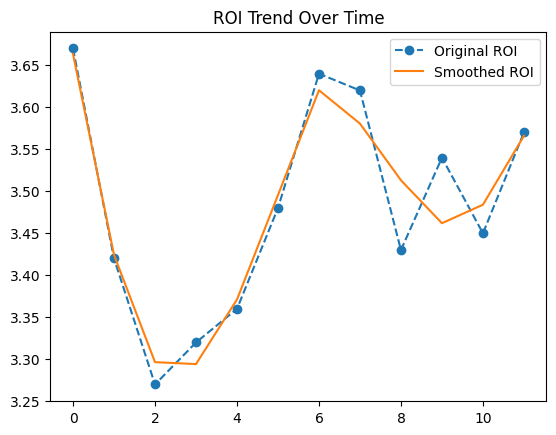

In [57]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

months = np.arange(len(df))
roi_smooth = savgol_filter(df["ROI"], 5, 2)

plt.plot(months, df["ROI"], 'o--', label="Original ROI")
plt.plot(months, roi_smooth, '-', label="Smoothed ROI")
plt.legend(); plt.title("ROI Trend Over Time")
plt.show()


In [58]:
################ Optimization: Ideal Marketing Spend ################

In [59]:
from scipy import optimize

# ROI function: negative because we minimize
def neg_roi(spend):
    revenue = 4000 + 3.2 * spend - 0.00008 * spend**2
    return -((revenue - spend) / spend)

res = optimize.minimize(neg_roi, x0=10000)
print("Optimal Marketing Spend:", round(res.x[0], 2))


Optimal Marketing Spend: 9999.88
